<a href="https://colab.research.google.com/github/williamejm/MNIST-Classification/blob/main/MNIST_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [29]:
np.random.seed(0)
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

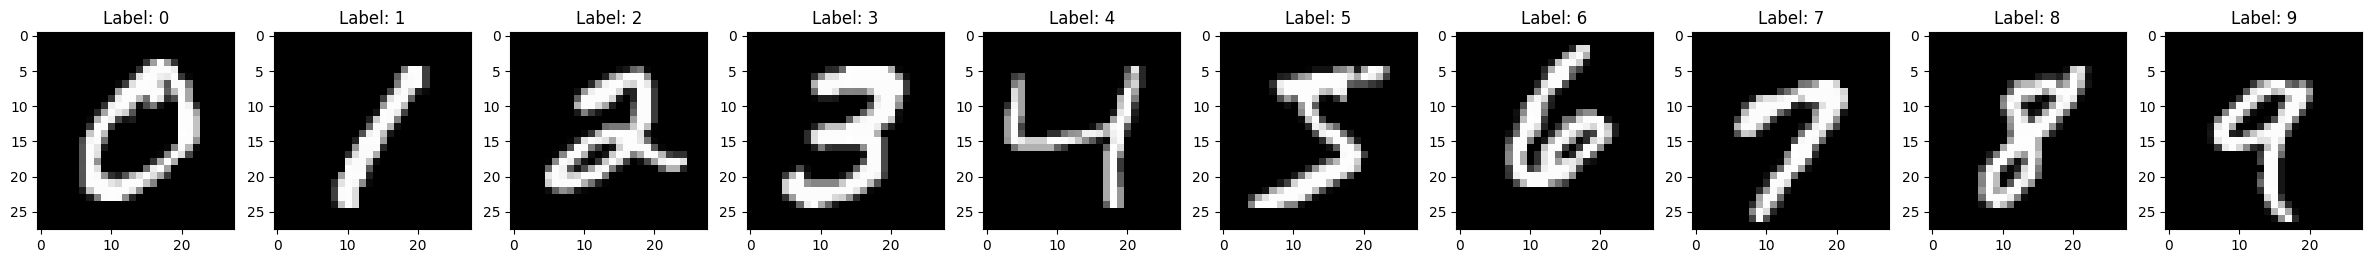

In [30]:
digits = 10
f, ax = plt.subplots(1, digits, figsize=(30, 30))

for i in range(0, digits):
  sample = x_train[y_train == i][0]
  ax[i].imshow(sample, cmap='gray')
  ax[i].set_title('Label: {}'.format(i), fontsize=12)

In [31]:
y_train = keras.utils.to_categorical(y_train, digits)
y_test = keras.utils.to_categorical(y_test, digits)

In [32]:
#normalize and reshape data
x_train = x_train / 255.0
x_test = x_test / 255.0
x_train = x_train.reshape(x_train.shape[0], -1)
x_test = x_test.reshape(x_test.shape[0], -1)
print(x_train.shape)

(60000, 784)


In [33]:
model = Sequential()
model.add(Dense(units=125, input_shape=(784,), activation='relu'))
model.add(Dense(units=125, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(units=10, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 125)               98125     
                                                                 
 dense_11 (Dense)            (None, 125)               15750     
                                                                 
 dropout_3 (Dropout)         (None, 125)               0         
                                                                 
 dense_12 (Dense)            (None, 10)                1260      
                                                                 
Total params: 115135 (449.75 KB)
Trainable params: 115135 (449.75 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [34]:
batchsize = 512
epochs=10
model.fit(x=x_train, y=y_train, batch_size=batchsize, epochs=epochs)

Epoch 1/10
118/118 [==============================] - 3s 13ms/step - loss: 0.6141 - accuracy: 0.8232
Epoch 2/10
118/118 [==============================] - 1s 10ms/step - loss: 0.2299 - accuracy: 0.9328
Epoch 3/10
118/118 [==============================] - 2s 14ms/step - loss: 0.1669 - accuracy: 0.9514
Epoch 4/10
118/118 [==============================] - 2s 17ms/step - loss: 0.1352 - accuracy: 0.9601
Epoch 5/10
118/118 [==============================] - 2s 13ms/step - loss: 0.1124 - accuracy: 0.9663
Epoch 6/10
118/118 [==============================] - 1s 10ms/step - loss: 0.0968 - accuracy: 0.9706
Epoch 7/10
118/118 [==============================] - 1s 10ms/step - loss: 0.0830 - accuracy: 0.9760
Epoch 8/10
118/118 [==============================] - 1s 11ms/step - loss: 0.0741 - accuracy: 0.9773
Epoch 9/10
118/118 [==============================] - 1s 11ms/step - loss: 0.0657 - accuracy: 0.9799
Epoch 10/10
118/118 [==============================] - 1s 11ms/step - loss: 0.0568 - accura

In [35]:
loss, accuracy = model.evaluate(x_test, y_test)
print('Test Loss {}, Test Accuracy {}'.format(loss, accuracy))

313/313 [==============================] - 1s 2ms/step - loss: 0.0769 - accuracy: 0.9767
Test Loss 0.07693140208721161, Test Accuracy 0.9767000079154968


In [38]:
predict = model.predict(x_test)
class_prob = np.argmax(predict, axis=1)
print(predict)
print(class_prob)

313/313 [==============================] - 1s 3ms/step
[[2.2422891e-07 5.2218530e-07 3.0317737e-04 ... 9.9920207e-01
  3.9491924e-06 1.1348533e-05]
 [7.5362809e-09 9.7252370e-05 9.9989313e-01 ... 5.2718622e-08
  8.4349477e-07 1.2514906e-10]
 [4.3995314e-07 9.9872583e-01 5.5402648e-05 ... 9.3727163e-04
  1.5624495e-04 9.5538485e-07]
 ...
 [1.8698854e-10 1.9318500e-09 1.5611212e-09 ... 7.4106390e-07
  4.8272420e-07 9.2121800e-06]
 [7.5339777e-08 5.5487126e-09 8.1917104e-09 ... 3.8380030e-08
  9.3560450e-04 3.6015251e-08]
 [5.0285816e-08 3.1969433e-10 1.0570397e-08 ... 8.3626779e-11
  1.1219940e-08 6.0634171e-12]]
[7 2 1 ... 4 5 6]


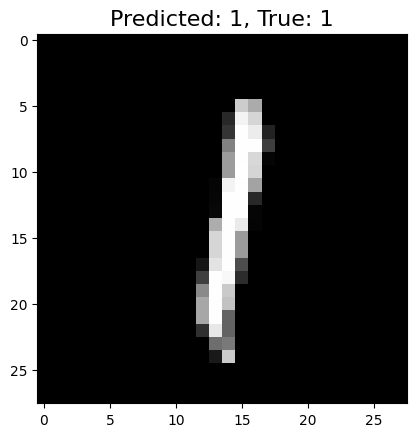

In [42]:
randomvar = np.random.choice(len(x_test))
x_sample = x_test[randomvar]
y_true = np.argmax(y_test, axis=1)
y_sample_true = y_true[randomvar]
y_sample_pred_class = class_prob[randomvar]

plt.title("Predicted: {}, True: {}".format(y_sample_pred_class, y_sample_true), fontsize=16)
plt.imshow(x_sample.reshape(28, 28), cmap='gray')

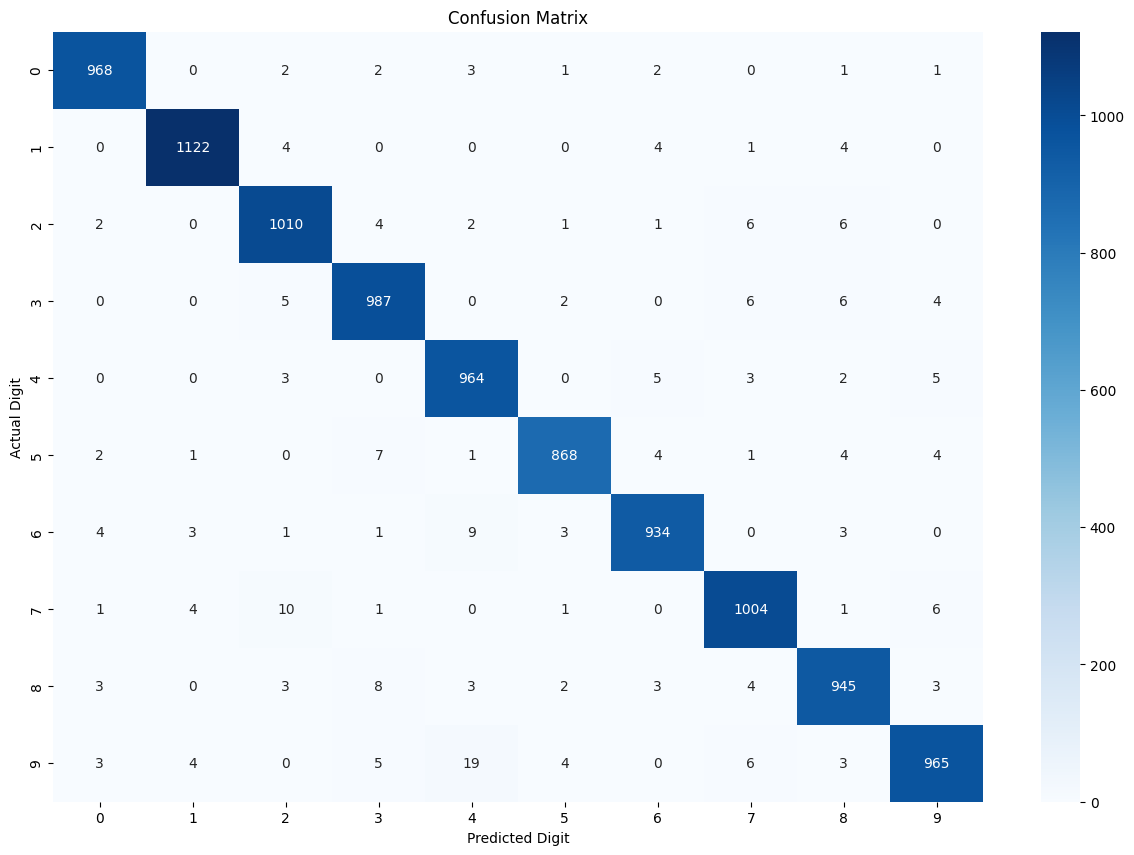

In [47]:
confusion_mtx = confusion_matrix(y_true, class_prob)

fig, ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(confusion_mtx, annot=True, fmt='d', ax=ax, cmap="Blues")
ax.set_xlabel('Predicted Digit')
ax.set_ylabel('Actual Digit')
ax.set_title('Confusion Matrix');